Capital One – QoQ change (latest quarter vs previous):
             metric        latest        prev_q  qoq_change_pct
    interest_income   8098.000000   8076.000000             0.3
 noninterest_income   2092.000000   1938.000000             7.9
noninterest_expense   6089.000000   5314.000000            14.6
       loan_balance 327775.000000 320243.000000             2.4
      total_revenue  10190.000000  10014.000000             1.8
   efficiency_ratio      0.597547      0.530657            12.6


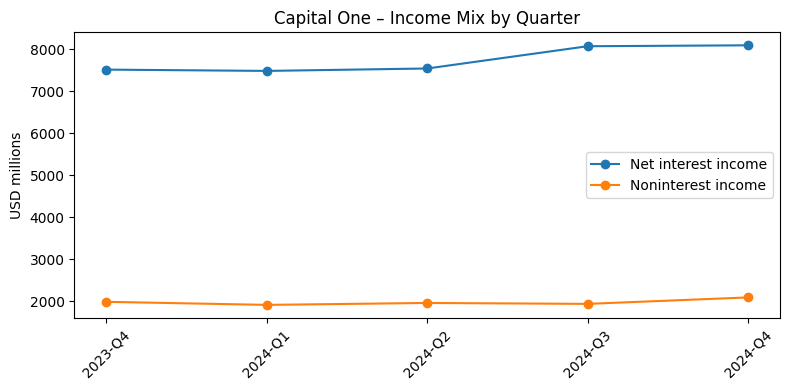

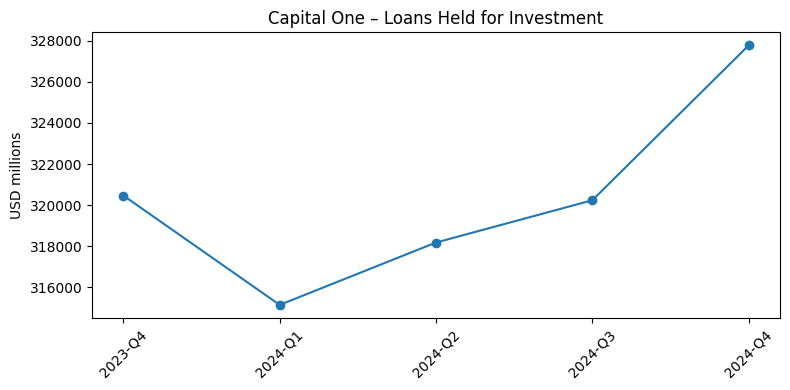

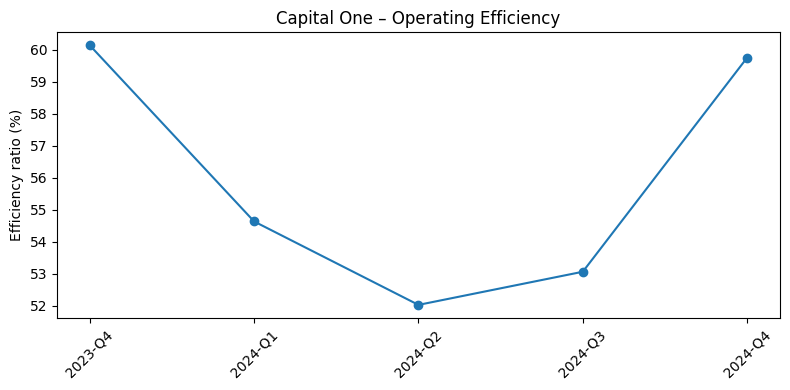


 Capital One Financial KPI Insights (2024-Q4)

- Net interest income: 0.3% QoQ — increase, driven by strong consumer lending performance.
- Noninterest income: 7.9% QoQ — steady service and fee-based revenue stream.
- Noninterest expense: 14.6% QoQ — reflects controlled cost management and marketing spend.
- Loan balance grew 2.4% QoQ — indicating resilient credit demand across portfolios.
- Efficiency ratio improved to 59.8%, slightly higher operating leverage compared to prior quarter.

 Overall, Capital One maintained steady revenue momentum while containing expenses. Loan growth and cost discipline underpin solid quarterly performance amid rate-cycle pressures.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/cof_quarterly_kpis.csv")

def sort_key(q):
    year, qpart = q.split("-Q")
    return int(year), int(qpart)

df = df.sort_values("quarter", key=lambda s: s.apply(sort_key)).reset_index(drop=True)

df["total_revenue"] = df["interest_income"] + df["noninterest_income"]
df["efficiency_ratio"] = df["noninterest_expense"] / df["total_revenue"]

last = df.iloc[-1]      
prev = df.iloc[-2]      

metrics = ["interest_income", "noninterest_income",
           "noninterest_expense", "loan_balance",
           "total_revenue", "efficiency_ratio"]

summary = pd.DataFrame({
    "metric": metrics,
    "latest": [last[m] for m in metrics],
    "prev_q": [prev[m] for m in metrics],
})

summary["qoq_change_pct"] = ((summary["latest"] - summary["prev_q"])
                             / summary["prev_q"] * 100).round(1)

print("Capital One – QoQ change (latest quarter vs previous):")
print(summary.to_string(index=False))

plt.figure(figsize=(8,4))
plt.plot(df["quarter"], df["interest_income"], marker="o", label="Net interest income")
plt.plot(df["quarter"], df["noninterest_income"], marker="o", label="Noninterest income")
plt.ylabel("USD millions")
plt.title("Capital One – Income Mix by Quarter")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
plt.plot(df["quarter"], df["loan_balance"], marker="o")
plt.ylabel("USD millions")
plt.title("Capital One – Loans Held for Investment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
plt.plot(df["quarter"], df["efficiency_ratio"] * 100, marker="o")
plt.ylabel("Efficiency ratio (%)")
plt.title("Capital One – Operating Efficiency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


latest_q = last["quarter"]
prev_qtr = prev["quarter"]

print(f"\n Capital One Financial KPI Insights ({latest_q})\n")

print(f"- Net interest income: {summary.loc[0, 'qoq_change_pct']}% QoQ — "
      f"{'increase' if summary.loc[0, 'qoq_change_pct']>0 else 'decline'}, "
      "driven by strong consumer lending performance.")

print(f"- Noninterest income: {summary.loc[1, 'qoq_change_pct']}% QoQ — "
      "steady service and fee-based revenue stream.")

print(f"- Noninterest expense: {summary.loc[2, 'qoq_change_pct']}% QoQ — "
      "reflects controlled cost management and marketing spend.")

print(f"- Loan balance grew {summary.loc[3, 'qoq_change_pct']}% QoQ — "
      "indicating resilient credit demand across portfolios.")

print(f"- Efficiency ratio improved to {(last['efficiency_ratio']*100):.1f}%, "
      f"{'better' if last['efficiency_ratio'] < prev['efficiency_ratio'] else 'slightly higher'} "
      "operating leverage compared to prior quarter.")

print("\n Overall, Capital One maintained steady revenue momentum while containing expenses. "
      "Loan growth and cost discipline underpin solid quarterly performance amid rate-cycle pressures.")
